In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/titanic_dataset .csv")  # Replace with actual path

# Display basic info
df.info()

# Display first few rows
df.head()

# Check shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Dataset contains 891 rows and 12 columns


In [15]:
# Set PassengerId as index
df.set_index("PassengerId", inplace=True)

# Summary statistics
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Count unique values in categorical columns
categorical_columns = ["Survived", "Pclass", "Sex", "Embarked"]
for col in categorical_columns:
    print(f"{col} unique values:\n", df[col].value_counts(), "\n")

Survived unique values:
 Survived
0    549
1    342
Name: count, dtype: int64 

Pclass unique values:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64 

Sex unique values:
 Sex
male      577
female    314
Name: count, dtype: int64 

Embarked unique values:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64 



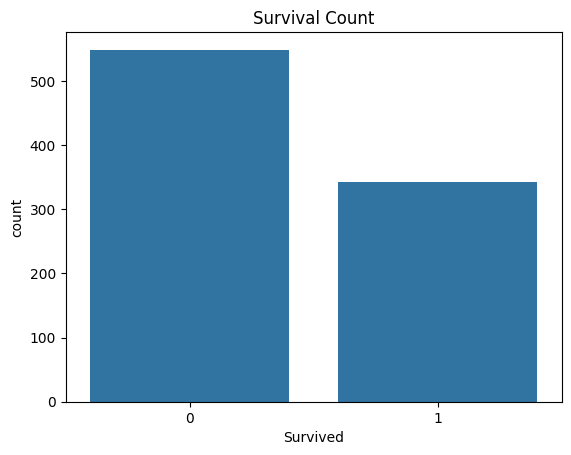

In [17]:
sns.countplot(data=df, x="Survived")
plt.title("Survival Count")
plt.show()

In [18]:
df["Pclass"].unique()

array([3, 1, 2])

In [19]:
df.rename(columns={"Sex": "Gender"}, inplace=True)

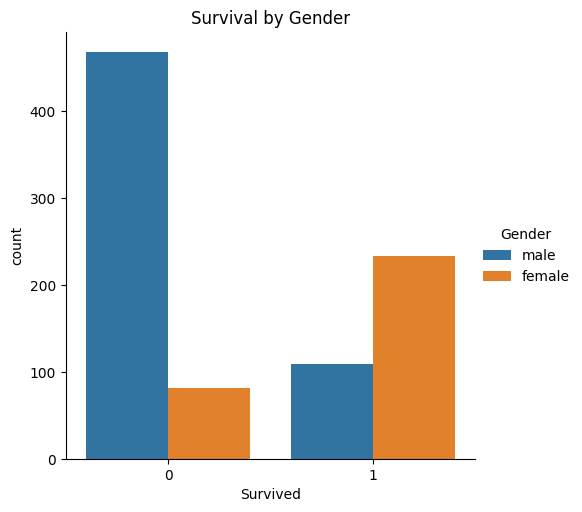

In [20]:
sns.catplot(x='Survived', hue='Gender', data=df, kind='count')
plt.title("Survival by Gender")
plt.show()

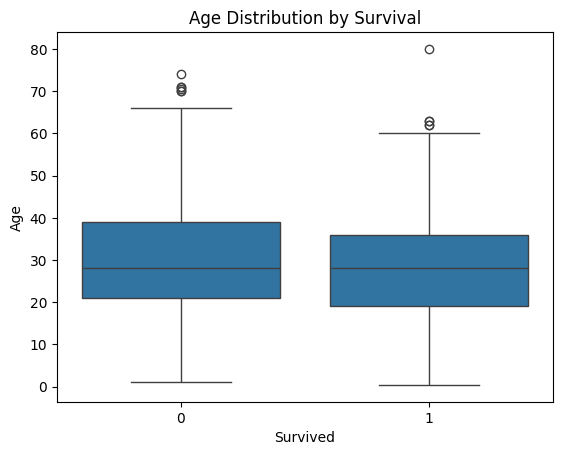

In [21]:
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age Distribution by Survival")
plt.show()

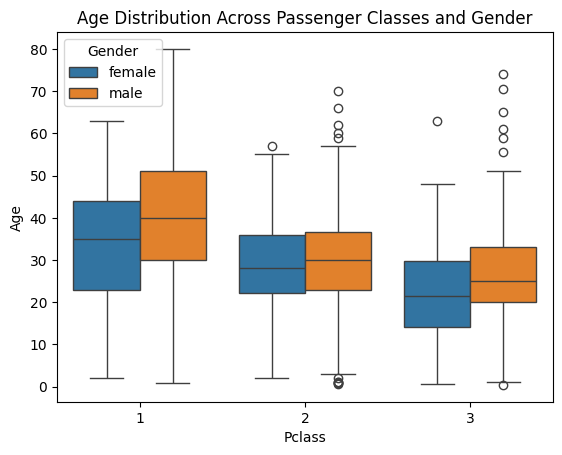

In [22]:
sns.boxplot(x="Pclass", y="Age", hue="Gender", data=df)
plt.title("Age Distribution Across Passenger Classes and Gender")
plt.show()

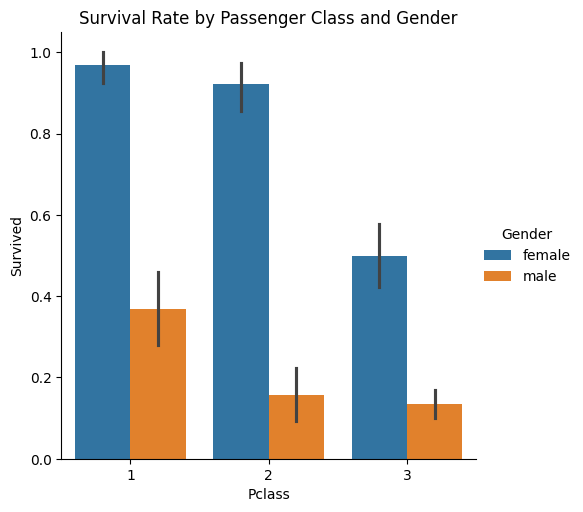

In [23]:
sns.catplot(x="Pclass", y="Survived", hue="Gender", data=df, kind="bar")
plt.title("Survival Rate by Passenger Class and Gender")
plt.show()

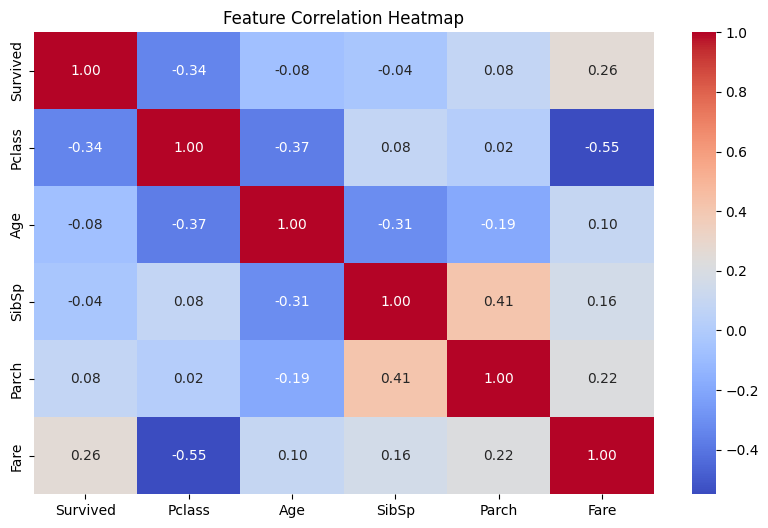

In [24]:
plt.figure(figsize=(10,6))

# Select only numerical columns
numerical_df = df.select_dtypes(include=["number"])

# Compute correlation and plot heatmap
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

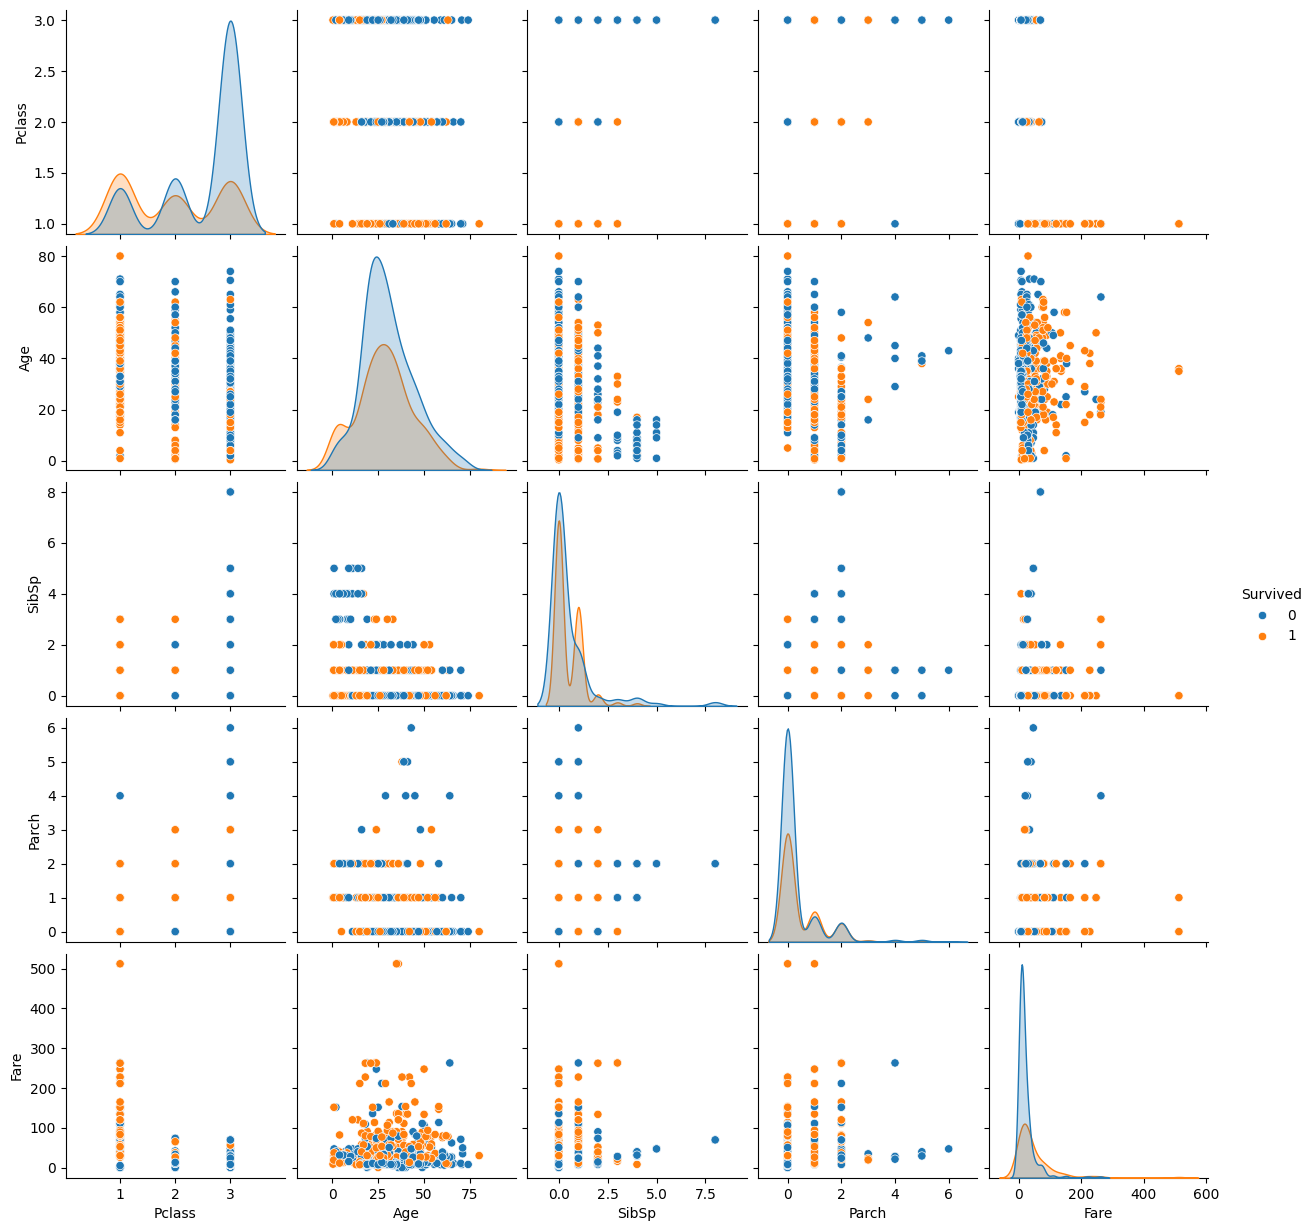

In [25]:
sns.pairplot(df, hue="Survived", diag_kind="kde")
plt.show()